<a href="https://colab.research.google.com/github/allenpatrickargente/CPEN-21A-CPE-1-1/blob/main/mga_code_hehe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

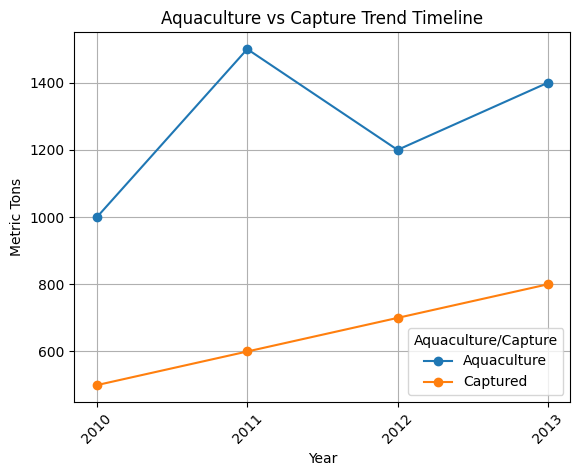

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define captured_vs_farmed DataFrame
captured_vs_farmed = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013],
    'Aquaculture_production_(metric_tons)': [1000, 1500, 1200, 1400],
    'Capture_fisheries_production_(metric_tons)': [500, 600, 700, 800]
})

# Define cap_vs_farm_time
cap_vs_farm_time = captured_vs_farmed[['Year', 'Aquaculture_production_(metric_tons)', 'Capture_fisheries_production_(metric_tons)']]

cap_vs_farm_time_pivoted = cap_vs_farm_time.melt(id_vars="Year", var_name="Aquaculture/Capture", value_name="Metric Tons")
cap_vs_farm_time_pivoted['Aquaculture/Capture'] = cap_vs_farm_time_pivoted['Aquaculture/Capture'].replace("Capture_fisheries_production_(metric_tons)", "Captured")
cap_vs_farm_time_pivoted['Aquaculture/Capture'] = cap_vs_farm_time_pivoted['Aquaculture/Capture'].replace("Aquaculture_production_(metric_tons)", "Aquaculture")

df = cap_vs_farm_time_pivoted.groupby(['Year', 'Aquaculture/Capture']).sum()['Metric Tons']
df.unstack().plot(marker="o")

plt.xticks(rotation=45)
plt.title('Aquaculture vs Capture Trend Timeline')
plt.xlabel('Year')
plt.ylabel('Metric Tons')
plt.grid(True)
x = [2010, 2011, 2012, 2013]
plt.xticks(x, x)

plt.show()


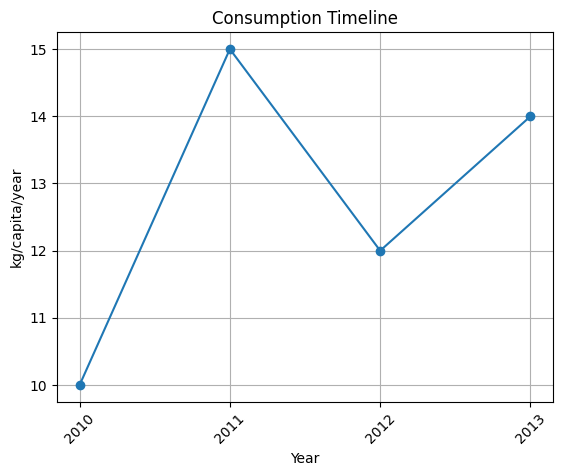

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define consumption DataFrame
consumption = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013],
    'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': [10, 15, 12, 14]
})

# Define consumption_time
consumption_time = consumption[['Year', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]

df2 = consumption_time.groupby(['Year']).sum()['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']
df2.plot(marker="o")

plt.xticks(rotation=45)
plt.title('Consumption Timeline')
plt.xlabel('Year')
plt.ylabel('kg/capita/year')
plt.grid(True)
x = [2010, 2011, 2012, 2013]
plt.xticks(x, x)

plt.show()


In [9]:
import pandas as pd
import plotly.express as px

# Define consumption DataFrame
consumption = pd.DataFrame({
    'Entity': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
    'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': [10, 15, 12, 14, 18]
})

# Define colors
colors = ['#fae588', '#f79d65', '#f9dc5c', '#e8ac65', '#e76f51', '#ef233c', '#b7094c']

consumption_Entity = consumption[['Entity', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
fig = px.treemap(data_frame=consumption_Entity, path=['Entity'], values='Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)', width=800, height=400, hover_data=None)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(
    treemapcolorway=colors,  # defines the colors in the treemap
    margin=dict(t=5, l=5, r=5, b=5)
)

fig.show()


In [11]:
!pip install plotly

import pandas as pd
import plotly.express as px

# Define consumption DataFrame
consumption = pd.DataFrame({
    'Entity': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
    'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': [10, 15, 12, 14, 18]
})

# Define colors
colors = ['#fae588', '#f79d65', '#f9dc5c', '#e8ac65', '#e76f51', '#ef233c', '#b7094c']

consumption_Entity = consumption[['Entity', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
fig = px.treemap(data_frame=consumption_Entity, path=['Entity'], values='Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)', width=800, height=400, hover_data=None)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(
    treemapcolorway=colors,  # defines the colors in the treemap
    margin=dict(t=5, l=5, r=5, b=5)
)

fig.show()


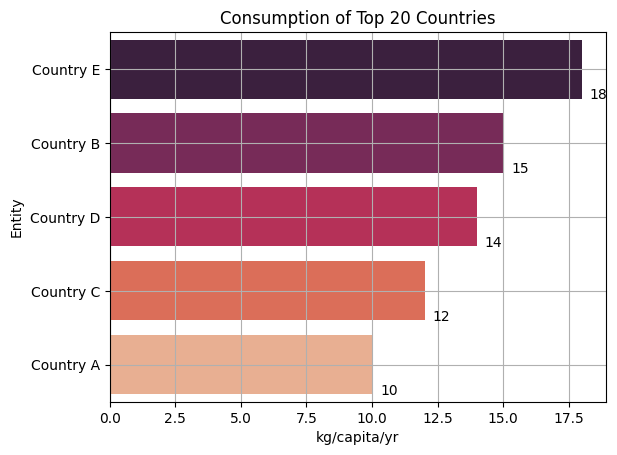

In [12]:
!pip install seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define consumption DataFrame
consumption = pd.DataFrame({
    'Entity': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
    'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': [10, 15, 12, 14, 18]
})

# Define colors
colors = ['#fae588', '#f79d65', '#f9dc5c', '#e8ac65', '#e76f51', '#ef233c', '#b7094c']

consumption_Entity_top20_bar = consumption[['Entity', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)']]
consumption_Entity_top20_bar = consumption_Entity_top20_bar.groupby('Entity', as_index=False).agg({'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': 'sum'})
consumption_Entity_top20_bar = consumption_Entity_top20_bar.sort_values('Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)', ascending=False).head(20)

fig3 = sns.barplot(x=consumption_Entity_top20_bar['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'], y=consumption_Entity_top20_bar['Entity'], palette="rocket")
plt.title('Consumption of Top 20 Countries')
plt.xlabel('kg/capita/yr')
plt.grid(True)

# Enabling the display of values on bars
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


show_values_on_bars(fig3, "h", 0.3)

plt.show()


<ipython-input-22-0d97ea6d1c64>:24: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



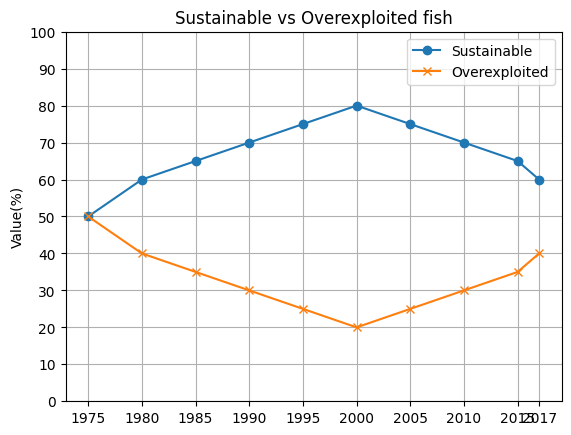

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the 'stock' DataFrame with relevant data
data = {
    'Year': [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2017],
    'Entity': ['World', 'World', 'World', 'World', 'World', 'World', 'World', 'World', 'World', 'World'],
    'Share of fish stocks within biologically sustainable levels (FAO, 2020)': [50, 60, 65, 70, 75, 80, 75, 70, 65, 60],
    'Share of fish stocks that are overexploited': [50, 40, 35, 30, 25, 20, 25, 30, 35, 40]
}

stock = pd.DataFrame(data)

# Drop the 'Code' column if it exists
if 'Code' in stock.columns:
    stock = stock.drop('Code', axis=1)

# Grouping the stock DataFrame
df4 = stock.rename(columns={
    'Share of fish stocks within biologically sustainable levels (FAO, 2020)': 'Sustainable',
    'Share of fish stocks that are overexploited': 'Overexploited'
})
df4 = df4[df4['Entity'] == 'World']
df4 = df4.groupby(['Year'], as_index=False).sum()

# Plotting the data
plt.plot('Year', 'Sustainable', data=df4, marker="o")
plt.plot('Year', 'Overexploited', data=df4, marker="x")
plt.legend()
plt.title('Sustainable vs Overexploited fish')
plt.ylabel('Value(%)')
plt.grid(True)
x = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2017]
y = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.xticks(x, x)
plt.yticks(y, y)

plt.show()
